In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
# Filtragem das colunas
notas = data.loc[:,'NU_NOTA_CN':'NU_NOTA_MT']
identificadores = data['NU_INSCRICAO']
notas_redacao = data.loc[:,'NU_NOTA_REDACAO']

In [4]:
# Compactando as colunas em um DataFrame
data = pd.merge(identificadores,notas, left_index=True, right_index=True)
data = pd.merge( data, notas_redacao, left_index = True, right_index= True)
data = data.fillna(0)
data

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,436.3,495.4,581.2,399.4,520.0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,474.5,544.1,599.0,459.8,580.0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,0.0,0.0,0.0,0.0,0.0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,0.0,0.0,0.0,0.0,0.0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,438.2,419.7,394.5,403.2,440.0
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,423.8,557.9,533.0,452.4,560.0
13727,5354503700ecf2388f68990435390b6e1ad454ee,460.5,528.9,569.3,398.0,600.0
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,422.5,621.7,569.0,386.6,460.0


In [5]:
# Gerando a média ponderada por prova
data['_TOTAL'] = (( data['NU_NOTA_MT'] * 3 ) + ( data['NU_NOTA_REDACAO'] * 3) + ( data['NU_NOTA_CN'] * 2 ) + ( data['NU_NOTA_LC']  * 1.5 ) + data['NU_NOTA_CH']) / 10.5

In [6]:
data.head() # Ok.
data = data.sort_values('_TOTAL', ascending = False)

In [7]:
data.insert(0, 'colocacao', range(1, 1 + len(data)))

In [8]:
melhores_notas = data.sort_values('_TOTAL', ascending = False)[:20]

Text(0.5, 0.95, 'Correlação entre Notas Finais do Enem 2016 e as notas de cada disciplina. ')

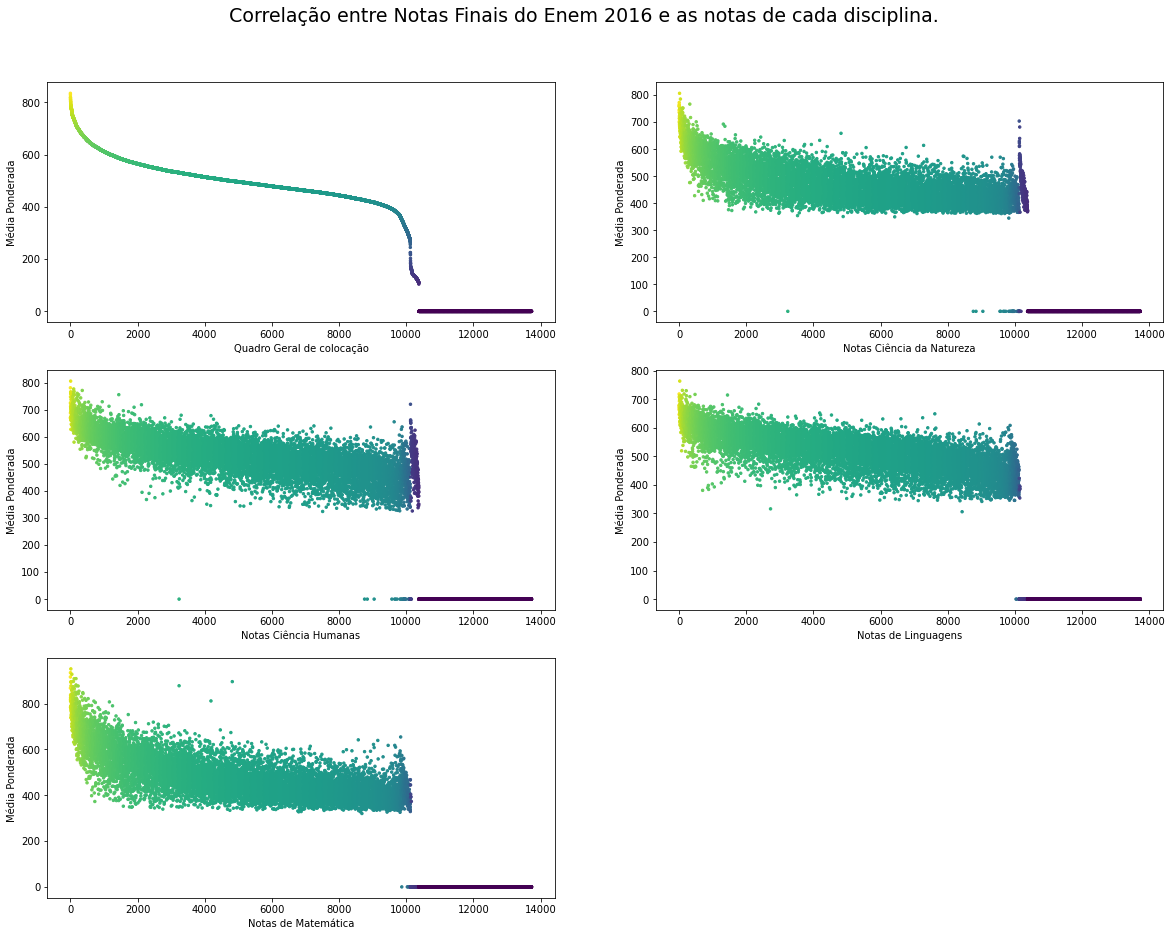

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
#fig.set_figheight(15)
ax[0,0].scatter(data.colocacao , data['_TOTAL'], s= 6 , c = data['_TOTAL'] ,cmap = 'viridis')
ax[0,0].set( xlabel = 'Quadro Geral de colocação', ylabel = 'Média Ponderada')
ax[0,1].scatter(data.colocacao , data['NU_NOTA_CN'], s= 6  , c = data['_TOTAL'],cmap = 'viridis' )
ax[0,1].set( xlabel = 'Notas Ciência da Natureza', ylabel = 'Média Ponderada')
ax[1,0].scatter(data.colocacao , data['NU_NOTA_CH'], s= 6 , c = data['_TOTAL'] ,cmap = 'viridis' )
ax[1,0].set( xlabel = 'Notas Ciência Humanas', ylabel = 'Média Ponderada')
ax[1,1].scatter(data.colocacao , data['NU_NOTA_LC'], s= 6 , c = data['_TOTAL'] ,cmap = 'viridis')
ax[1,1].set( xlabel = 'Notas de Linguagens', ylabel = 'Média Ponderada')
ax[2,0].scatter(data.colocacao , data['NU_NOTA_MT'], s= 6 , c = data['_TOTAL'] ,cmap = 'viridis')
ax[2,0].set( xlabel = 'Notas de Matemática', ylabel = 'Média Ponderada')
fig.delaxes(ax[2][1])
fig.suptitle('Correlação entre Notas Finais do Enem 2016 e as notas de cada disciplina. ' , y = 0.95, size = 19)

# As cores indicam colocação no resultado final do exame. Os pontos amarelos são as melhores notas e as azuis as piores.
# É possível ver que dificilmente aqueles que obtiveram maior pontuação em uma competência do teste não são 
# os melhores 'gerais' do exame.

In [10]:
data.head(7)

,colocacao,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,_TOTAL
10801,1,848daf808904864c1ee5d51545a2539e2dcbe901,744.2,670.3,646.7,916.6,960.0,834.147619
3226,2,97166da67df0908861a868cf318b277c4bdbb0da,735.9,782.1,718.5,868.2,920.0,828.214286
3682,3,b733ccac4e5b7c1da0448f1dad7990ec0793b1d2,764.6,689.0,707.6,935.1,840.0,819.514286
9011,4,78ca18b6fea7ccd3e067b3945cf200f8686209a7,772.3,725.7,678.8,784.5,980.0,817.333333
4755,5,8588b01c2ff81ad3c9ff31cd89fc094896c4aa69,757.7,748.7,672.1,817.1,940.0,813.671429
12707,6,19982f867b8f23a829a2f738374770708ec7f263,758.5,673.1,677.3,826.1,940.0,809.938095
6039,7,17ae668ce9041105883e9db101d614f58d526f66,760.2,726.5,662.0,811.0,940.0,808.847619


In [11]:
# Os dados numa regressão linear devem ser livres de valores faltantes e valores discrepantes.
# Atenção então para valores em que é 0. Pois pode 'inclinar' a reta pra baixo p valores que realmente existem.

# Correlações 

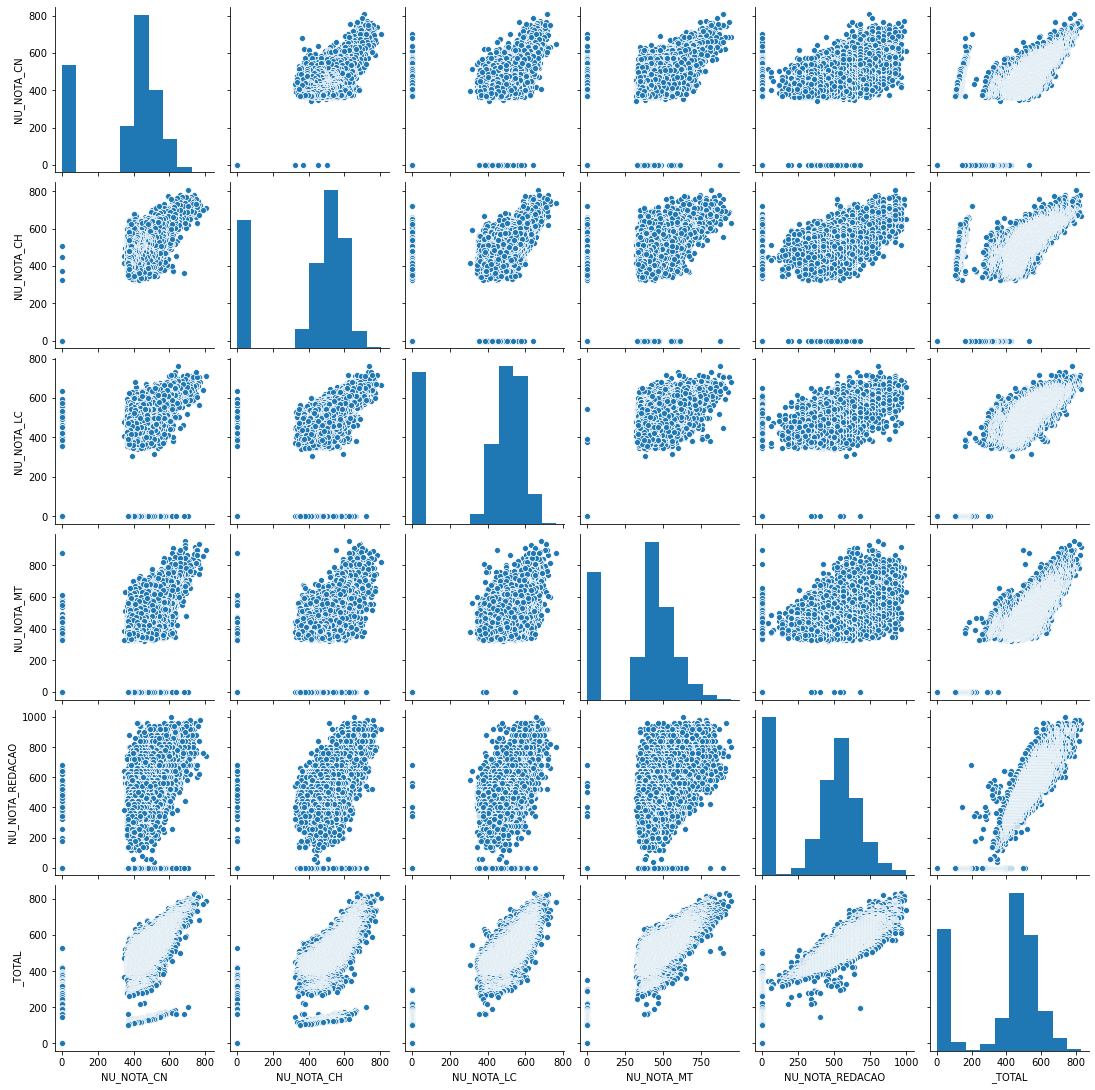

In [12]:
data_corr =  data.drop('colocacao',1)
sns.pairplot(data_corr)

In [13]:
data_corr.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,_TOTAL
NU_NOTA_CN,1.000000,0.969323,0.920917,0.907039,0.857810,0.952953
NU_NOTA_CH,0.969323,1.000000,0.934704,0.903608,0.871199,0.956047
NU_NOTA_LC,0.920917,0.934704,1.000000,0.943954,0.904795,0.973312
NU_NOTA_MT,0.907039,0.903608,0.943954,1.000000,0.875929,0.965941
NU_NOTA_REDACAO,0.857810,0.871199,0.904795,0.875929,1.000000,0.954306
_TOTAL,0.952953,0.956047,0.973312,0.965941,0.954306,1.000000


In [14]:
# Tá ficando bom!!!

In [15]:
data.head(7)

,colocacao,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,_TOTAL
10801,1,848daf808904864c1ee5d51545a2539e2dcbe901,744.2,670.3,646.7,916.6,960.0,834.147619
3226,2,97166da67df0908861a868cf318b277c4bdbb0da,735.9,782.1,718.5,868.2,920.0,828.214286
3682,3,b733ccac4e5b7c1da0448f1dad7990ec0793b1d2,764.6,689.0,707.6,935.1,840.0,819.514286
9011,4,78ca18b6fea7ccd3e067b3945cf200f8686209a7,772.3,725.7,678.8,784.5,980.0,817.333333
4755,5,8588b01c2ff81ad3c9ff31cd89fc094896c4aa69,757.7,748.7,672.1,817.1,940.0,813.671429
12707,6,19982f867b8f23a829a2f738374770708ec7f263,758.5,673.1,677.3,826.1,940.0,809.938095
6039,7,17ae668ce9041105883e9db101d614f58d526f66,760.2,726.5,662.0,811.0,940.0,808.847619


In [16]:
train, test = train_test_split(data, test_size = 0.12)

In [17]:
train.head()

,colocacao,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,_TOTAL
9417,3765,20715e5e35886136a96ded0e7b028a4428c606b5,461.1,555.7,526.3,460.2,600.0,518.852381
13614,825,3be7d25697f5de984da22ae19d8218676cb32f0c,524.2,594.8,599.4,558.1,780.0,624.438095
11555,6558,b393c35d3afabdcad5e83a13c6c27ec5c2abfb37,377.7,459.7,508.0,483.2,500.0,469.209524
5338,3877,891bfb719eaf424d727ede1f035e9ff030f1fbc1,418.2,528.0,504.6,520.5,580.0,516.457143
1063,3867,fd2010687ddbeb4815326976995ed82f3c627de9,434.5,509.9,535.6,520.8,560.0,516.638095


In [18]:
x_train = train[[ 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
y_train = train[['NU_NOTA_MT']]
x_test = test[[ 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
y_test = test[['NU_NOTA_MT']]



In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(x_test)

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [23]:
score

0.9030921791311802

In [24]:
teste = pd.read_csv('test.csv')
teste

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,41,PR,17,F,1,1,2,0,2,...,40.0,500.0,E,E,D,A,B,A,NaN,A
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,35,SP,17,M,2,1,2,0,2,...,100.0,520.0,C,C,C,A,A,A,NaN,A
4573,655fa6306720ff16e825903b5422a46608a77545,35,SP,19,M,1,1,1,2,1,...,80.0,640.0,D,F,D,B,B,A,NaN,D
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,52,GO,17,M,2,2,3,0,1,...,80.0,520.0,C,E,C,A,A,A,NaN,A


In [25]:
notas_teste = teste.loc[:,'NU_NOTA_CN':'NU_NOTA_LC']
identificadores_teste = teste['NU_INSCRICAO']
notas_redacao_teste = teste.loc[:,'NU_NOTA_REDACAO']

teste = pd.merge(identificadores_teste,notas_teste, left_index=True, right_index=True)
teste = pd.merge( teste, notas_redacao_teste, left_index = True, right_index= True)
teste = teste.fillna(0)
NU_INSCRICAO = teste['NU_INSCRICAO']
teste = teste.drop('NU_INSCRICAO', 1)
teste

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
3,0.0,0.0,0.0,0.0
4,592.9,492.6,571.4,320.0
...,...,...,...,...
4571,398.3,558.2,511.6,500.0
4572,427.6,579.7,471.1,520.0
4573,639.2,643.8,604.9,640.0
4574,427.1,467.9,540.2,520.0


In [26]:
NU_NOTA_MT = regressor.predict(teste)

In [27]:
answer = pd.DataFrame()

In [28]:
answer['NU_INSCRICAO'] = NU_INSCRICAO

In [29]:
answer['NU_NOTA_MT'] = NU_NOTA_MT

In [30]:
#answer.to_csv( 'answer.csv', index = False )

In [32]:
answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,425.014838
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,481.398856
2,b38a03232f43b11c9d0788abaf060f7366053b6d,561.840600
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-2.707179
4,715494628a50142ce8cb17191cfe6d0f3cae0934,548.962538
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,445.734773
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,428.478703
4573,655fa6306720ff16e825903b5422a46608a77545,593.388668
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,487.417796
